This analysis is borrowed from here https://realpython.com/k-means-clustering-python/

In [105]:
from kneed import KneeLocator

In [106]:
from sklearn.datasets import make_blobs

In [107]:
from sklearn.cluster import KMeans

In [108]:
from sklearn.metrics import silhouette_score

In [109]:
from sklearn.preprocessing import StandardScaler

In [151]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=0.75)

<AxesSubplot:>

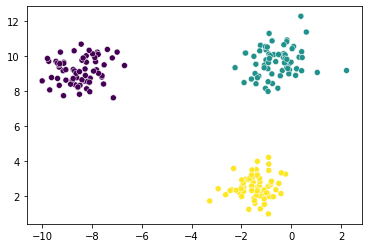

In [152]:
import seaborn as sns
sns.scatterplot(x=features[:,0], y=features[:,1], c=true_labels)

In [153]:
scaler = StandardScaler()

In [154]:
scaled_features = scaler.fit_transform(features)

<AxesSubplot:>

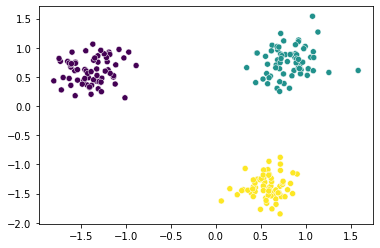

In [155]:
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

In [156]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300)

In [157]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [158]:
kmeans.cluster_centers_

array([[-1.37516337,  0.60241545],
       [ 0.81447294,  0.76280929],
       [ 0.56918574, -1.38590996]])

In [159]:
kmeans.n_iter_

3

In [160]:
kmeans.labels_

array([2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1,
       1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1,
       2, 2], dtype=int32)

In [161]:
kmeans.inertia_

17.400626640805157

In [162]:
cluster_sizes = range(1, 11)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

<AxesSubplot:>

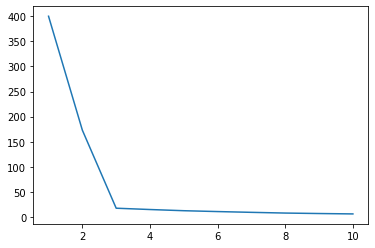

In [163]:
sns.lineplot(x=cluster_sizes, y=sse)

In [164]:
kl = KneeLocator(cluster_sizes, sse, curve="convex", direction="decreasing")

In [165]:
kl.elbow

3

In [166]:
silhouette_coefficients = []
cluster_sizes = range(2, 11)
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

<AxesSubplot:>

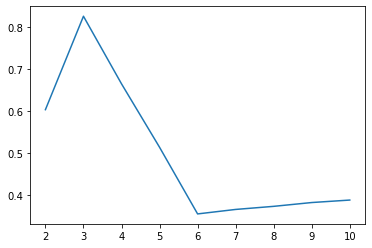

In [167]:
sns.lineplot(x=cluster_sizes, y=silhouette_coefficients)